In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import networkx as nx
import time
from math import sqrt
import random
import numpy as np
import heapq, math
from typing import List, Tuple, Optional, Dict, Any
import math
import heapq
from collections import defaultdict, deque

In [154]:
#Load dataset
df_lb = pd.read_csv("lb_road_data.csv")

In [155]:
df_lb

,start_node,end_node,street_name,road_direction,distance_meters,speed_limit_kph,duration_seconds,road_class,road_type,is_blocked,is_dead_end
0,"(14.153439, 121.248028)","(14.155045, 121.250268)",unnamed road,twoway,300,30,36.00,tertiary,asphalt,0,0
1,"(14.153439, 121.248028)","(14.153306, 121.248118)",unnamed road,twoway,18,30,2.16,tertiary,asphalt,0,0
2,"(14.153306, 121.248118)","(14.153336, 121.249875)",unnamed road,twoway,190,30,22.80,tertiary,asphalt,0,0
3,"(14.153336, 121.249875)","(14.153071, 121.250281)",unnamed road,twoway,54,30,6.48,tertiary,asphalt,0,0
4,"(14.153071, 121.250281)","(14.153597, 121.250329)",unnamed road,twoway,59,30,7.08,tertiary,asphalt,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1940,"(14.165493, 121.236500)","(14.165484, 121.237079)",Melanio A. Gadup,twoway,64,45,5.12,tertiary,asphalt,0,0
1941,"(14.165484, 121.237079)","(14.165477, 121.237474)",Melanio A. Gadup,twoway,44,45,3.52,tertiary,asphalt,0,0
1942,"(14.165477, 121.237474)","(14.165484, 121.237800)",Melanio A. Gadup,twoway,34,45,2.72,tertiary,asphalt,0,0
1943,"(14.165484, 121.237800)","(14.165473, 121.237994)",Melanio A. Gadup,twoway,21,45,1.68,tertiary,asphalt,0,0


In [156]:
# Drop unnecesarry columsn
df = df_lb.drop(columns=['street_name', 'road_class', 'road_type'])

In [157]:
df

,start_node,end_node,road_direction,distance_meters,speed_limit_kph,duration_seconds,is_blocked,is_dead_end
0,"(14.153439, 121.248028)","(14.155045, 121.250268)",twoway,300,30,36.00,0,0
1,"(14.153439, 121.248028)","(14.153306, 121.248118)",twoway,18,30,2.16,0,0
2,"(14.153306, 121.248118)","(14.153336, 121.249875)",twoway,190,30,22.80,0,0
3,"(14.153336, 121.249875)","(14.153071, 121.250281)",twoway,54,30,6.48,0,0
4,"(14.153071, 121.250281)","(14.153597, 121.250329)",twoway,59,30,7.08,0,0
...,...,...,...,...,...,...,...,...
1940,"(14.165493, 121.236500)","(14.165484, 121.237079)",twoway,64,45,5.12,0,0
1941,"(14.165484, 121.237079)","(14.165477, 121.237474)",twoway,44,45,3.52,0,0
1942,"(14.165477, 121.237474)","(14.165484, 121.237800)",twoway,34,45,2.72,0,0
1943,"(14.165484, 121.237800)","(14.165473, 121.237994)",twoway,21,45,1.68,0,0


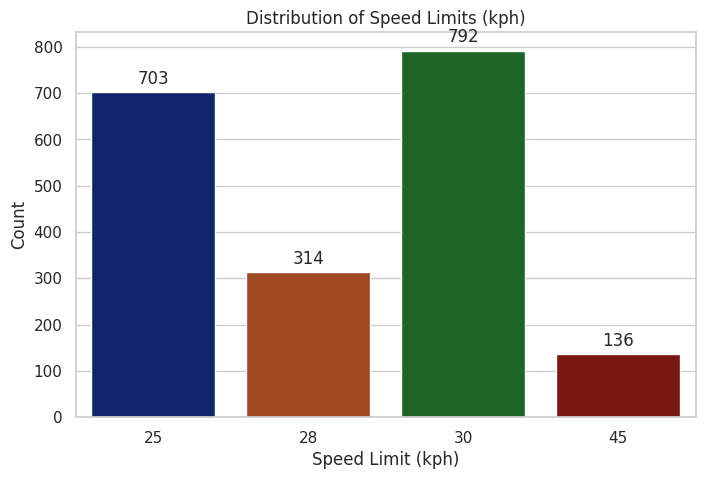

In [158]:
# Data Visualization
sns.set_theme(style="whitegrid")

# 1.) Speed Limit Distribution
plt.figure(figsize=(8, 5))
ax1 = sns.countplot(data=df, x='speed_limit_kph', palette='dark')
plt.title('Distribution of Speed Limits (kph)')
plt.xlabel('Speed Limit (kph)')
plt.ylabel('Count')
# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, padding=3)
plt.show()

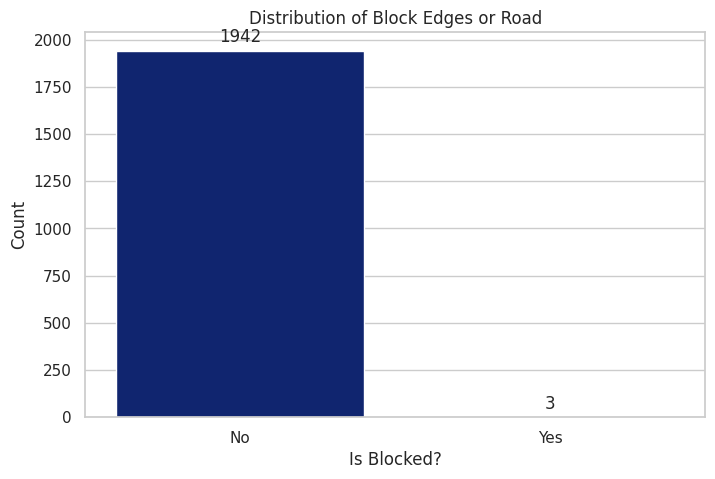

In [159]:
# 2.) Block edges Distribution
plt.figure(figsize=(8, 5))
ax2 = sns.countplot(data=df, x='is_blocked', palette='dark')
plt.title('Distribution of Block Edges or Road')
plt.xlabel('Is Blocked?')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
# Add value labels on bars
for container in ax2.containers:
    ax2.bar_label(container, padding=3)
plt.show()

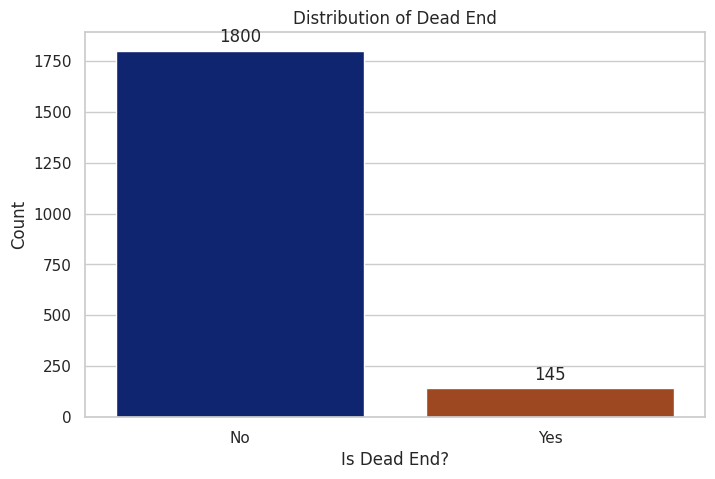

In [160]:
# 3.) Dead End Distribution
plt.figure(figsize=(8, 5))
ax3 = sns.countplot(data=df, x='is_dead_end', palette='dark')
plt.title('Distribution of Dead End')
plt.xlabel('Is Dead End?')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
# Add value labels on bars
for container in ax3.containers:
    ax3.bar_label(container, padding=3)
plt.show()

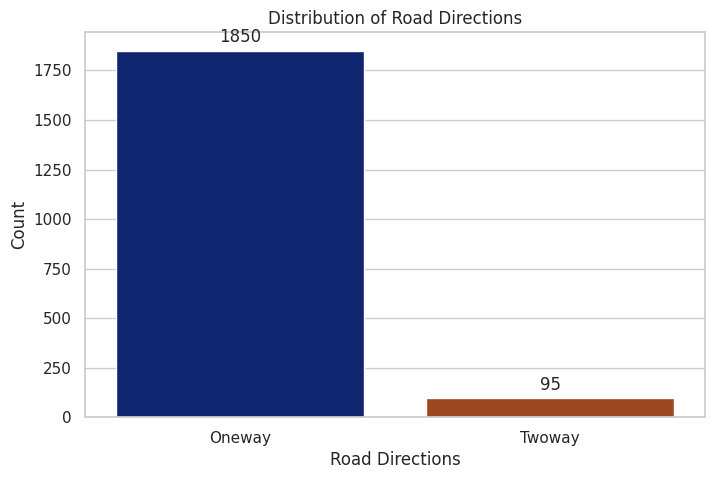

In [161]:
# 4.) Road Direction Distribution
plt.figure(figsize=(8, 5))
ax4 = sns.countplot(data=df, x='road_direction', palette='dark')
plt.title('Distribution of Road Directions')
plt.xlabel('Road Directions')
plt.xticks(ticks=[0, 1], labels=['Oneway', 'Twoway'])
plt.ylabel('Count')
# Add value labels on bars
for container in ax4.containers:
    ax4.bar_label(container, padding=3)
plt.show()

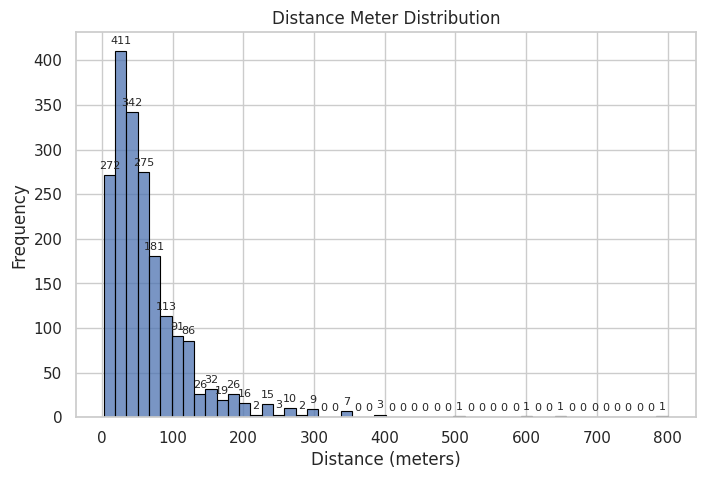

In [162]:
# 5.) Distance Meter Distribution
plt.figure(figsize=(8,5))
ax5 = sns.histplot(df['distance_meters'], bins=50, palette='dark', edgecolor='black')
plt.title('Distance Meter Distribution')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.grid(True, alpha=1)
# Add value labels on bars (for histplot)
for container in ax5.containers:
    ax5.bar_label(container, padding=3, fontsize=8)
plt.show()

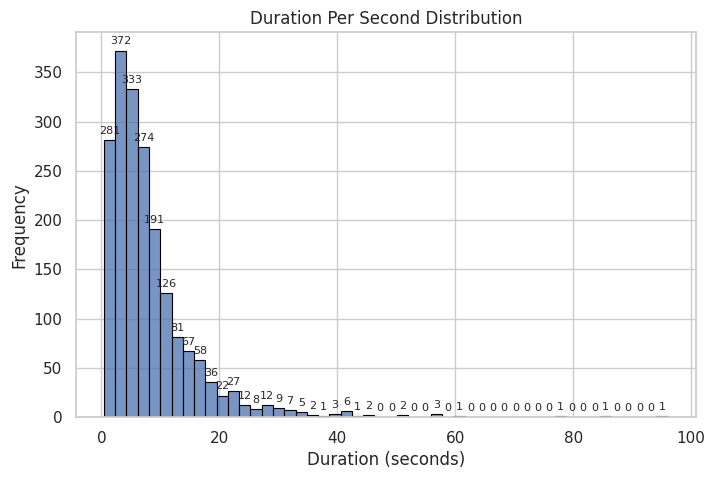

In [163]:
# 6.) Distance per Second Distribution
plt.figure(figsize=(8,5))
ax6 = sns.histplot(df['duration_seconds'], bins=50, palette='dark', edgecolor='black')
plt.title('Duration Per Second Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True, alpha=1)
# Add value labels on bars (for histplot)
for container in ax6.containers:
    ax6.bar_label(container, padding=3, fontsize=8)
plt.show()

In [164]:
# Prepare the data for modeling
# Convert categorical variables to numerical ones
df['road_direction'] = df['road_direction'].map({'oneway': 0, 'twoway': 1})

# Extract latitude and longitude from start_node and end_node
def extract_coords(coord_str):
    lat, lon = coord_str.strip('()').split(',')
    return float(lat), float(lon)

df['start_lat'], df['start_lon'] = zip(*df['start_node'].apply(extract_coords))
df['end_lat'], df['end_lon'] = zip(*df['end_node'].apply(extract_coords))

# Features and target
X = df[['distance_meters', 'speed_limit_kph', 'is_blocked', 'is_dead_end']]
y = df['duration_seconds']

# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 1556
Test size: 389


In [165]:
df.head()

,start_node,end_node,road_direction,distance_meters,speed_limit_kph,duration_seconds,is_blocked,is_dead_end,start_lat,start_lon,end_lat,end_lon
0,"(14.153439, 121.248028)","(14.155045, 121.250268)",1,300,30,36.00,0,0,14.153439,121.248028,14.155045,121.250268
1,"(14.153439, 121.248028)","(14.153306, 121.248118)",1,18,30,2.16,0,0,14.153439,121.248028,14.153306,121.248118
2,"(14.153306, 121.248118)","(14.153336, 121.249875)",1,190,30,22.80,0,0,14.153306,121.248118,14.153336,121.249875
3,"(14.153336, 121.249875)","(14.153071, 121.250281)",1,54,30,6.48,0,0,14.153336,121.249875,14.153071,121.250281
4,"(14.153071, 121.250281)","(14.153597, 121.250329)",1,59,30,7.08,0,0,14.153071,121.250281,14.153597,121.250329


Starting 10 Experimental Runs...

=== Experimental Run 1/10 ===
Start: (14.179543, 121.241683)
End: (14.153306, 121.248118)
    Algorithm  Path Cost  Execution Time (s)  Path Length  Travel Time (min)
0    Dijkstra  1611.2400            0.005471           52           8.420000
1          A*  1611.2400            0.007844           52           8.420000
2  Greedy BFS  1752.0812            0.000479           57           9.359076
3  Ant Colony  1621.2240            2.587884           51           8.472000

=== Experimental Run 2/10 ===
Start: (14.171040, 121.243496)
End: (14.149233, 121.253016)
    Algorithm  Path Cost  Execution Time (s)  Path Length  Travel Time (min)
0    Dijkstra   1427.712            0.002601           44              7.436
1          A*   1427.712            0.007089           44              7.436
2  Greedy BFS   1438.848            0.000319           45              7.494
3  Ant Colony   1427.712            1.973629           44              7.436

=== Experiment

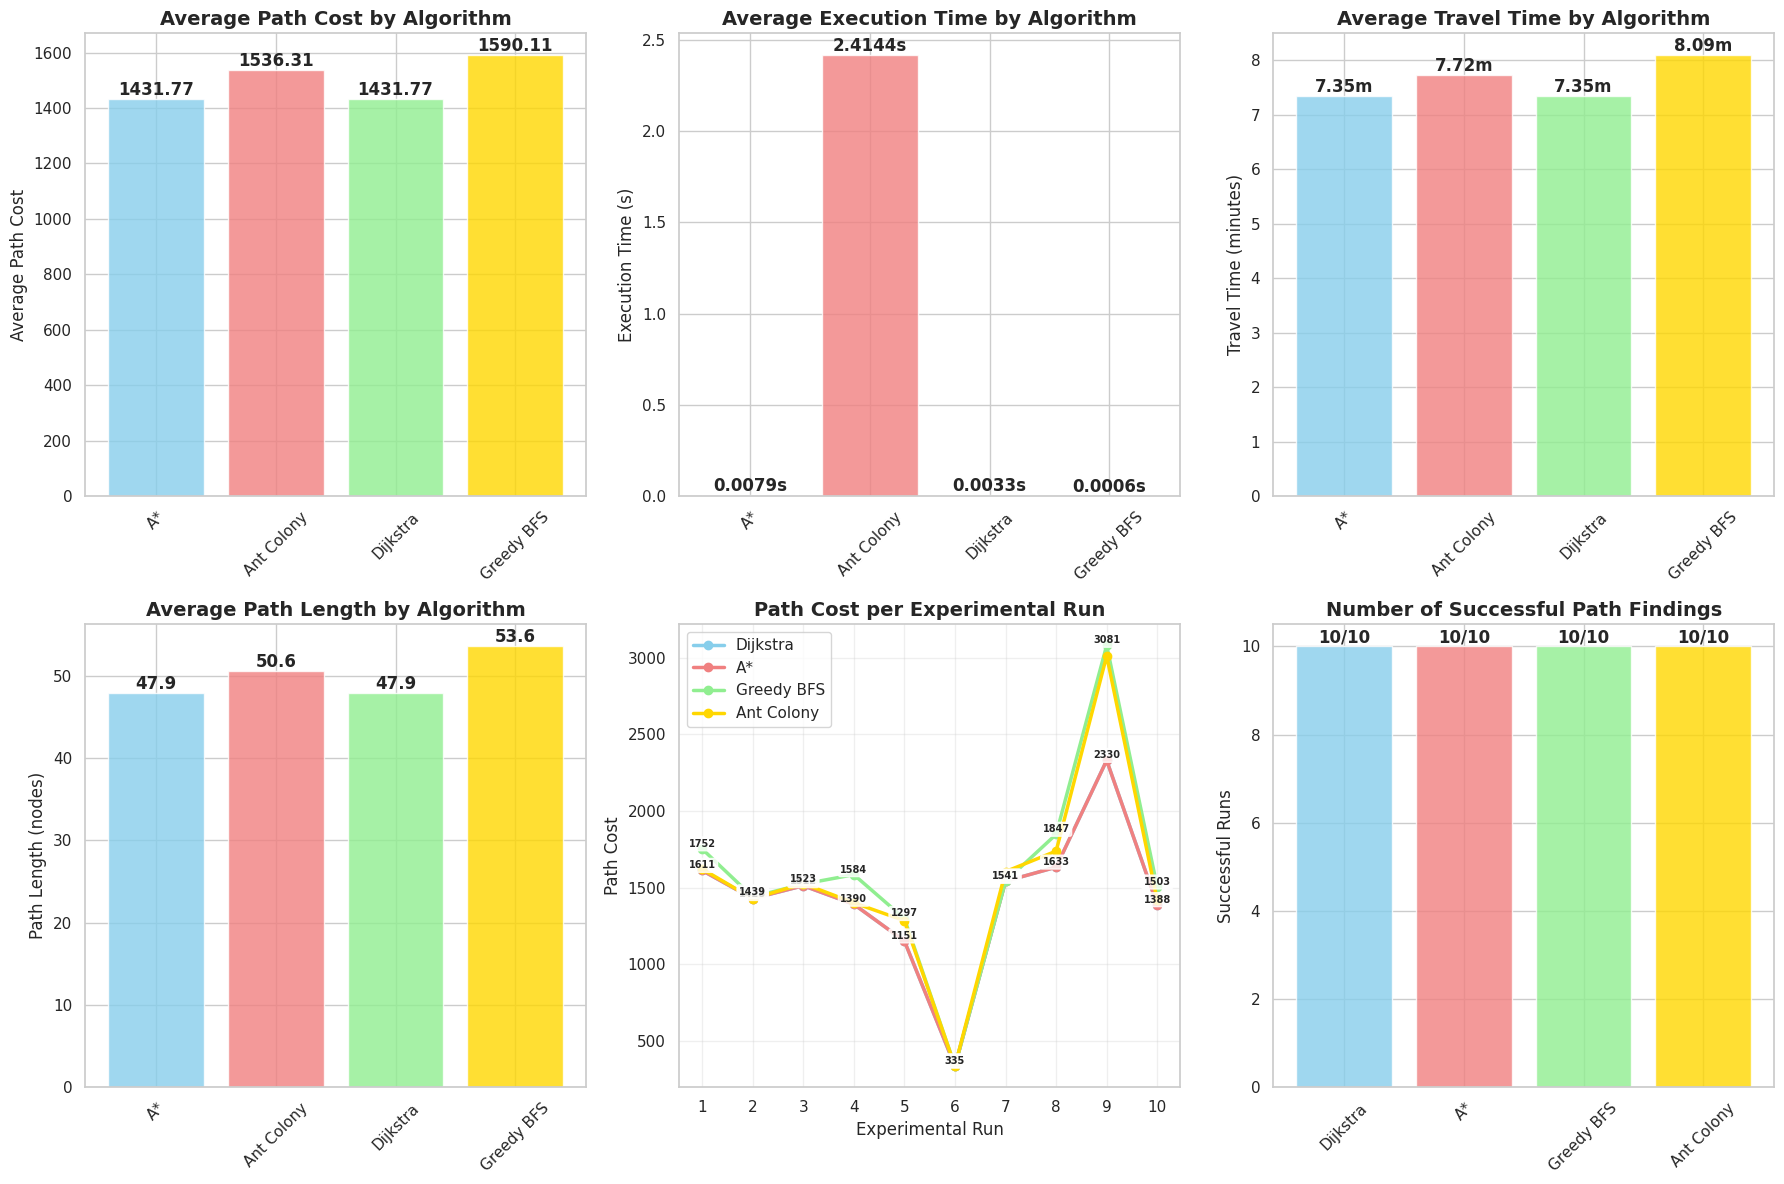


STATISTICAL ANALYSIS
ANOVA Test for Path Costs: F-statistic = 0.1847, p-value = 0.9061
❌ No significant differences between algorithms (p ≥ 0.05)


In [166]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import heapq
import random
import numpy as np
import time
from math import sqrt

# -------------------------------
# Experimental Runs Setup
# -------------------------------
start_nodes = [
    "(14.179543, 121.241683)",
    "(14.171040, 121.243496)",
    "(14.171858, 121.243272)",
    "(14.173302, 121.243276)",
    "(14.173451, 121.243273)",
    "(14.175292, 121.243018)",
    "(14.181253, 121.226203)",
    "(14.171483, 121.242017)",
    "(14.175736, 121.222110)",
    "(14.171264, 121.258229)"
]

end_nodes = [
    "(14.153306, 121.248118)",
    "(14.149233, 121.253016)",
    "(14.150054, 121.252873)",
    "(14.151516, 121.252529)",
    "(14.170005, 121.254786)",
    "(14.170340, 121.245723)",
    "(14.161556, 121.242401)",
    "(14.150111, 121.250916)",
    "(14.163471, 121.254012)",
    "(14.171397, 121.248930)"
]

# -------------------------------
# Helper: parse coordinates safely
# -------------------------------
def parse_coords(node):
    if isinstance(node, str) and node.startswith("("):
        lat, lon = node.strip("()").split(",")
        return float(lat), float(lon)
    elif isinstance(node, (tuple, list)) and len(node) == 2:
        return node
    return (0.0, 0.0)

# -------------------------------
# Helper: Compute Travel Time (in minutes)
# -------------------------------
def compute_travel_time(G, path):
    if not path or len(path) < 2:
        return float("inf")  # no path found
    try:
        total_seconds = sum(G[u][v]["duration"] for u, v in zip(path[:-1], path[1:]))
        return total_seconds / 60  # convert to minutes
    except KeyError:
        return float("inf")  # invalid/broken path

# -------------------------------
# Select cost metric
# -------------------------------
def compute_edge_weight(row, mode="duration"):
    if mode == "duration":
        return row["duration_seconds"]
    elif mode == "distance":
        return row["distance_meters"]
    elif mode == "hybrid":
        return 0.7 * row["duration_seconds"] + 0.3 * row["distance_meters"]
    else:
        raise ValueError("Invalid cost metric. Use 'duration', 'distance', or 'hybrid'.")

# -------------------------------
# Build Graph
# -------------------------------
def build_graph(df, cost_mode="hybrid"):
    G = nx.DiGraph()
    for _, row in df.iterrows():
        if not row.get("is_blocked", False):
            weight = compute_edge_weight(row, cost_mode)
            u, v = row["start_node"], row["end_node"]

            # Oneway vs. twoway edges
            if row["road_direction"] == 0:  # oneway
                G.add_edge(u, v,
                           weight=weight,
                           distance=row["distance_meters"],
                           duration=row["duration_seconds"],
                           is_blocked=row["is_blocked"])
            else:  # twoway
                G.add_edge(u, v, weight=weight,
                           distance=row["distance_meters"],
                           duration=row["duration_seconds"],
                           is_blocked=row["is_blocked"])
                G.add_edge(v, u, weight=weight,
                           distance=row["distance_meters"],
                           duration=row["duration_seconds"],
                           is_blocked=row["is_blocked"])
    return G

# -------------------------------
# Heuristic Function
# -------------------------------
def heuristic(u, v):
    u_lat, u_lon = parse_coords(u)
    v_lat, v_lon = parse_coords(v)
    return sqrt((u_lat - v_lat) ** 2 + (u_lon - v_lon) ** 2)

# -------------------------------
# Optimized Algorithms
# -------------------------------
# ----------------Dijkstra's Algorithm---------------
def run_dijkstra(G, start, end):
    start_time = time.time()
    try:
        path = nx.shortest_path(G, source=start, target=end, weight="weight", method="dijkstra")
        total_cost = sum(G[u][v]["weight"] for u, v in zip(path[:-1], path[1:]))
    except (nx.NetworkXNoPath, nx.NodeNotFound):
        return None, float("inf"), time.time() - start_time
    return path, total_cost, time.time() - start_time

# ----------------A* Algorithm---------------
class AStarOptimizer:
    def __init__(self, G):
        self.G = G
        self.cache = {}   # dito i-store ang heuristic values

    def find_path(self, start, end):
        start_time = time.time()
        if end not in self.cache:
            self.cache[end] = {n: heuristic(n, end) for n in self.G.nodes()}
        try:
            path = nx.astar_path(
                self.G, start, end,
                heuristic=lambda u, v: self.cache[end][u],
                weight="weight"
            )
            total_cost = sum(self.G[u][v]["weight"] for u, v in zip(path[:-1], path[1:]))
        except (nx.NetworkXNoPath, nx.NodeNotFound):
            return None, float("inf"), time.time() - start_time
        return path, total_cost, time.time() - start_time

# ----------------Greedy Best-First Search---------------
class GreedyBFSOptimizer:
    def __init__(self, G):
        self.G = G

    def find_path(self, start, end):
        start_time = time.time()
        open_set = [(heuristic(start, end), start)]
        came_from = {}
        visited = set()

        while open_set:
            _, current = heapq.heappop(open_set)
            if current == end:
                # reconstruct path
                path = [current]
                while current in came_from:
                    current = came_from[current]
                    path.append(current)
                path.reverse()
                # Calculate actual cost considering blocked edges
                try:
                    cost = sum(self.G[u][v]["weight"] for u, v in zip(path[:-1], path[1:]))
                    return path, cost, time.time() - start_time
                except KeyError:
                    # Path contains blocked/invalid edges
                    return None, float("inf"), time.time() - start_time

            if current in visited:
                continue
            visited.add(current)

            for neighbor in self.G.neighbors(current):
                if neighbor not in visited:
                    # Check if edge is not blocked before considering it
                    if not self.G[current][neighbor].get('is_blocked', False):
                        came_from[neighbor] = current
                        heapq.heappush(open_set, (heuristic(neighbor, end), neighbor))

        return None, float("inf"), time.time() - start_time

# ----------------Partial-Enhanced-Ant-Colony-Optimization-Algorithm---------------
class OptimizedAntColony:
    def __init__(self, graph, n_ants=20, n_iterations=100, decay=0.5, alpha=1, beta=2, gamma=2,
                 elitist_factor=2, stagnation_limit=15, initial_pheromone=1.0):
        self.graph = graph
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.elitist_factor = elitist_factor
        self.stagnation_limit = stagnation_limit
        self.initial_pheromone = initial_pheromone

        # Initialize pheromones only for existing edges
        self._initialize_pheromones()

        self.best_path = None
        self.best_cost = float('inf')
        self.stagnation_count = 0
        self.dead_end_nodes = set()

    def _initialize_pheromones(self):
        """Initialize pheromones with directional guidance toward the end node"""
        self.pheromone = {}
        for u, v, d in self.graph.edges(data=True):
            if not d.get('is_blocked', False):
                # Use initial pheromone value for all valid edges
                self.pheromone[(u, v)] = self.initial_pheromone
            else:
                # Very low pheromone for blocked edges
                self.pheromone[(u, v)] = 1e-10

    def _is_edge_blocked(self, u, v):
        """Check if an edge is blocked in the current graph"""
        try:
            return self.graph[u][v].get('is_blocked', False)
        except KeyError:
            return True  # Edge doesn't exist or is blocked

    def _get_edge_weight(self, u, v):
        """Get the current weight of an edge, considering blocking"""
        try:
            if self.graph[u][v].get('is_blocked', False):
                return float('inf')
            return self.graph[u][v]['weight']
        except KeyError:
            return float('inf')

    def _find_dead_end_nodes(self, end):
        """More efficient dead-end detection"""
        # Use BFS from end node to find reachable nodes
        reachable = set()
        queue = [end]

        while queue:
            node = queue.pop(0)
            if node in reachable:
                continue
            reachable.add(node)

            # Add all predecessors that can reach this node
            for pred in self.graph.predecessors(node):
                if (not self._is_edge_blocked(pred, node) and
                    pred not in reachable):
                    queue.append(pred)

        # Find dead ends: nodes that can't reach the end
        self.dead_end_nodes = set(self.graph.nodes()) - reachable

        # Also mark nodes that only lead to dead ends
        changed = True
        while changed:
            changed = False
            for node in set(self.graph.nodes()) - self.dead_end_nodes:
                # Check if all outgoing edges lead to dead ends or are blocked
                has_valid_exit = False
                for neighbor in self.graph.neighbors(node):
                    if (not self._is_edge_blocked(node, neighbor) and
                        neighbor not in self.dead_end_nodes):
                        has_valid_exit = True
                        break

                if not has_valid_exit and node != end:
                    self.dead_end_nodes.add(node)
                    changed = True

    def run(self, start, end, max_retries=3):
        start_time = time.time()

        # Update dead-end detection for current graph state
        self._find_dead_end_nodes(end)

        # Reset if previous best path is now invalid
        if self.best_path and not self._is_path_valid(self.best_path):
            self.best_path = None
            self.best_cost = float('inf')

        for retry in range(max_retries):
            found_valid_path = False

            for iteration in range(self.n_iterations):
                paths, costs = self._explore(start, end)

                if paths:  # Found at least one valid path
                    found_valid_path = True
                    self._update_best_solution(paths, costs)

                    # Early convergence check
                    if self.stagnation_count >= self.stagnation_limit:
                        break

                self._update_pheromones(paths, costs, end)

            if found_valid_path and self.best_path:
                exec_time = time.time() - start_time
                return self.best_path, self.best_cost, exec_time

            # If no path found, increase exploration
            self.alpha = max(0.5, self.alpha - 0.2)  # Reduce pheromone influence
            self.beta = min(5, self.beta + 0.5)     # Increase heuristic influence

        # Final attempt with relaxed parameters
        self._find_dead_end_nodes(end)
        paths, costs = self._explore(start, end)
        self._update_best_solution(paths, costs)

        exec_time = time.time() - start_time
        return self.best_path, self.best_cost, exec_time

    def _is_path_valid(self, path):
        """Check if a path is still valid with current graph state"""
        if not path or len(path) < 2:
            return False

        for u, v in zip(path[:-1], path[1:]):
            if self._is_edge_blocked(u, v):
                return False
        return True

    def _reset_pheromones(self):
        """Reset pheromone levels to initial state."""
        for u, v, d in self.graph.edges(data=True):
            self.pheromone[(u, v)] = self.initial_pheromone
            if not isinstance(self.graph, nx.DiGraph):
                self.pheromone[(v, u)] = self.pheromone[(u, v)]
        self.best_path = None
        self.best_cost = float('inf')
        self.stagnation_count = 0

    def _explore(self, start, end):
        paths, costs = [], []
        for _ in range(self.n_ants):
            path = self._construct_path(start, end)
            if path and path[-1] == end:
                cost = sum(self.graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
                paths.append(path)
                costs.append(cost)
        return paths, costs

    def _construct_path(self, start, end):
        path = [start]
        current = start
        visited = set([start])
        max_steps = 200  # Increased to prevent premature termination

        for step in range(max_steps):
            if current == end:
                return path

            # Get all possible next nodes that aren't blocked
            neighbors = []
            for neighbor in self.graph.neighbors(current):
                # Skip if edge is blocked or already visited
                if (not self._is_edge_blocked(current, neighbor) and
                    neighbor not in visited and
                    neighbor not in self.dead_end_nodes):
                    neighbors.append(neighbor)

            if not neighbors:
                # No valid neighbors, backtrack
                if len(path) > 1:
                    path.pop()
                    current = path[-1]
                    continue
                else:
                    return None  # No path found

            # Select next node using ACO probability with pheromone trail guidance
            next_node = self._select_next_node(current, neighbors, end)
            if next_node is None:
                return None

            path.append(next_node)
            visited.add(next_node)
            current = next_node

        return None  # Exceeded max steps

    def _select_next_node(self, current, unvisited, end):
        if not unvisited:
            return None

        epsilon = 1e-10
        probabilities = []

        for neighbor in unvisited:
            # Skip blocked edges
            if self._is_edge_blocked(current, neighbor):
                continue

            # Get pheromone level
            pheromone_level = self.pheromone.get((current, neighbor), 1e-10)

            # Calculate heuristic (distance to goal)
            dist_to_goal = heuristic(neighbor, end)

            # Apply gamma to scale the heuristic importance - FIXED: prevent overflow
            heuristic_value = 1.0 / (dist_to_goal + epsilon)

            # Use logarithmic scaling to prevent overflow
            if pheromone_level > 0 and heuristic_value > 0:
                try:
                    # Calculate probability using log to prevent overflow
                    log_prob = (self.alpha * np.log(pheromone_level + epsilon) +
                               self.beta * np.log(heuristic_value + epsilon))
                    prob = np.exp(log_prob)
                except (OverflowError, ValueError):
                    prob = epsilon
            else:
                prob = epsilon

            probabilities.append((neighbor, prob))

        if not probabilities:
            return None

        # Normalize probabilities
        nodes, probs = zip(*probabilities)
        total_prob = sum(probs)

        if total_prob <= 0:
            # If all probabilities are zero, use uniform distribution
            return random.choice(nodes)

        normalized_probs = [p / total_prob for p in probs]

        # Select next node based on probabilities
        return np.random.choice(nodes, p=normalized_probs)

    def _update_best_solution(self, paths, costs):
        if costs and min(costs) < self.best_cost:
            idx = np.argmin(costs)
            self.best_path = paths[idx]
            self.best_cost = costs[idx]
            self.stagnation_count = 0
        else:
            self.stagnation_count += 1

    def _update_pheromones(self, paths, costs, end):
        """Enhanced pheromone update with directional guidance"""
        # Evaporate all pheromones
        for edge in self.pheromone:
            self.pheromone[edge] *= self.decay

        # Deposit pheromones based on path quality
        for path, cost in zip(paths, costs):
            if path and path[-1] == end:  # Only reward paths that reach the end
                deposit = 1 / max(0.1, cost)

                # Enhanced deposit: reward edges that move toward the goal
                for i, (u, v) in enumerate(zip(path[:-1], path[1:])):
                    # Calculate progress toward goal
                    progress_bonus = 1.0
                    if i > 0:
                        prev_dist = heuristic(path[i-1], end)
                        curr_dist = heuristic(v, end)
                        if curr_dist < prev_dist:  # Moving toward goal
                            progress_bonus = 1.5  # Bonus for progress

                    self.pheromone[(u, v)] += deposit * progress_bonus
                    if not isinstance(self.graph, nx.DiGraph):
                        self.pheromone[(v, u)] += deposit * progress_bonus

        # Elite reinforcement - strongly reinforce the best path
        if self.best_path and self.best_cost < float('inf'):
            elite_deposit = self.elitist_factor / max(0.1, self.best_cost)
            for u, v in zip(self.best_path[:-1], self.best_path[1:]):
                self.pheromone[(u, v)] += elite_deposit
                if not isinstance(self.graph, nx.DiGraph):
                    self.pheromone[(v, u)] += elite_deposit

        # Ensure minimum pheromone level to maintain exploration
        min_pheromone = 1e-5
        for edge in self.pheromone:
            self.pheromone[edge] = max(self.pheromone[edge], min_pheromone)

# -------------------------------
# Experimental Runs
# -------------------------------
def run_experiments(df, num_runs=10):
    # Build graph (choose: duration / distance / hybrid)
    G = build_graph(df, cost_mode="hybrid")

    all_results = []

    for run in range(num_runs):
        print(f"\n=== Experimental Run {run + 1}/{num_runs} ===")
        print(f"Start: {start_nodes[run]}")
        print(f"End: {end_nodes[run]}")

        start_node = start_nodes[run]
        end_node = end_nodes[run]

        # Initialize algorithms
        astar = AStarOptimizer(G)
        greedy = GreedyBFSOptimizer(G)
        ant_colony = OptimizedAntColony(G, n_ants=15, n_iterations=50, decay=0.6, alpha=1, beta=2, gamma=2,
                                      elitist_factor=1.5, stagnation_limit=10)

        # Run all algorithms
        d_path, d_cost, d_time = run_dijkstra(G, start_node, end_node)
        a_path, a_cost, a_time = astar.find_path(start_node, end_node)
        g_path, g_cost, g_time = greedy.find_path(start_node, end_node)
        ant_path, ant_cost, ant_time = ant_colony.run(start_node, end_node)

        # Calculate travel time in minutes and path length
        d_time_total = compute_travel_time(G, d_path)
        a_time_total = compute_travel_time(G, a_path)
        g_time_total = compute_travel_time(G, g_path)
        ant_time_total = compute_travel_time(G, ant_path)

        # Get path lengths (number of nodes in path)
        d_length = len(d_path) if d_path else 0
        a_length = len(a_path) if a_path else 0
        g_length = len(g_path) if g_path else 0
        ant_length = len(ant_path) if ant_path else 0

        # Store results
        run_results = [
            ("Dijkstra", d_cost, d_time, d_length, d_time_total, run + 1),
            ("A*", a_cost, a_time, a_length, a_time_total, run + 1),
            ("Greedy BFS", g_cost, g_time, g_length, g_time_total, run + 1),
            ("Ant Colony", ant_cost, ant_time, ant_length, ant_time_total, run + 1)
        ]

        all_results.extend(run_results)

        # Print current run results
        metrics_df = pd.DataFrame(run_results, columns=["Algorithm", "Path Cost", "Execution Time (s)", "Path Length", "Travel Time (min)", "Run"])
        print(metrics_df[["Algorithm", "Path Cost", "Execution Time (s)", "Path Length", "Travel Time (min)"]])

    # Create comprehensive results dataframe
    results_df = pd.DataFrame(all_results, columns=["Algorithm", "Path Cost", "Execution Time (s)", "Path Length", "Travel Time (min)", "Run"])

    return results_df

# -------------------------------
# Run Experiments and Analyze Results
# -------------------------------
print("Starting 10 Experimental Runs...")
results_df = run_experiments(df, num_runs=10)

# Display overall statistics
print("\n" + "="*80)
print("OVERALL EXPERIMENTAL RESULTS")
print("="*80)

# Summary statistics with box-plot style formatting
summary = results_df.groupby('Algorithm').agg({
    'Path Cost': ['mean', 'std', 'min', 'max'],
    'Execution Time (s)': ['mean', 'std', 'min', 'max'],
    'Travel Time (min)': ['mean', 'std', 'min', 'max'],
    'Path Length': ['mean', 'std', 'min', 'max']
}).round(4)

# Print results in a clean box-type format
algorithms = results_df['Algorithm'].unique()

print("\n" + "═" * 100)
print("📊 PERFORMANCE SUMMARY ACROSS 10 EXPERIMENTAL RUNS")
print("═" * 100)

for algo in algorithms:
    algo_data = results_df[results_df['Algorithm'] == algo]
    valid_runs = algo_data[algo_data['Path Cost'] < float('inf')]

    if len(valid_runs) > 0:
        print(f"\n┌────────────────────────────────── {algo:^15} ──────────────────────────────────┐")

        # Path Cost
        cost_mean = valid_runs['Path Cost'].mean()
        cost_std = valid_runs['Path Cost'].std()
        cost_min = valid_runs['Path Cost'].min()
        cost_max = valid_runs['Path Cost'].max()
        print(f"│   Path Cost:        Mean: {cost_mean:10.4f}  │  Std: {cost_std:8.4f}                │")
        print(f"│                     Min:  {cost_min:10.4f}  │  Max: {cost_max:8.4f}                │")

        # Execution Time
        time_mean = valid_runs['Execution Time (s)'].mean()
        time_std = valid_runs['Execution Time (s)'].std()
        time_min = valid_runs['Execution Time (s)'].min()
        time_max = valid_runs['Execution Time (s)'].max()
        print(f"│   Execution Time:   Mean: {time_mean:10.4f}s │  Std: {time_std:8.4f}s              │")
        print(f"│                     Min:  {time_min:10.4f}s │  Max: {time_max:8.4f}s              │")

        # Travel Time
        travel_mean = valid_runs['Travel Time (min)'].mean()
        travel_std = valid_runs['Travel Time (min)'].std()
        travel_min = valid_runs['Travel Time (min)'].min()
        travel_max = valid_runs['Travel Time (min)'].max()
        print(f"│   Travel Time:      Mean: {travel_mean:10.4f}m │  Std: {travel_std:8.4f}m              │")
        print(f"│                     Min:  {travel_min:10.4f}m │  Max: {travel_max:8.4f}m              │")

        # Path Length
        length_mean = valid_runs['Path Length'].mean()
        length_std = valid_runs['Path Length'].std()
        length_min = valid_runs['Path Length'].min()
        length_max = valid_runs['Path Length'].max()
        print(f"│   Path Length:      Mean: {length_mean:10.4f}  │  Std: {length_std:8.4f}                │")
        print(f"│                     Min:  {length_min:10.4f}  │  Max: {length_max:8.4f}                │")

        # Success Rate
        success_rate = (len(valid_runs) / len(algo_data)) * 100
        print(f"│   Success Rate:     {success_rate:6.2f}% ({len(valid_runs)}/{len(algo_data)} runs)                    │")

        print("└──────────────────────────────────────────────────────────────────────────────────────────┘")
    else:
        print(f"\n┌────────────────────────────────── {algo:^15} ──────────────────────────────────┐")
        print("│                    NO SUCCESSFUL PATHS FOUND IN ANY RUN                    │")
        print("└──────────────────────────────────────────────────────────────────────────────────────────┘")

# Success rate comparison
print("\n" + "═" * 60)
print("🏆 SUCCESS RATE COMPARISON")
print("═" * 60)

success_rates = {}
for algo in algorithms:
    algo_data = results_df[results_df['Algorithm'] == algo]
    valid_runs = len(algo_data[algo_data['Path Cost'] < float('inf')])
    total_runs = len(algo_data)
    success_rate = (valid_runs / total_runs) * 100 if total_runs > 0 else 0
    success_rates[algo] = success_rate

# Sort by success rate
sorted_rates = sorted(success_rates.items(), key=lambda x: x[1], reverse=True)

for i, (algo, rate) in enumerate(sorted_rates, 1):
    algo_data = results_df[results_df['Algorithm'] == algo]
    valid_runs = len(algo_data[algo_data['Path Cost'] < float('inf')])
    total_runs = len(algo_data)
    print(f" {i:2d}. {algo:<15}: {rate:6.2f}% ({valid_runs:2d}/{total_runs:2d} runs)")

# Best performing algorithm per run
print("\n" + "═" * 70)
print("🎯 BEST PERFORMING ALGORITHM PER EXPERIMENTAL RUN")
print("═" * 70)

best_per_run = []
for run in range(1, 11):
    run_data = results_df[results_df['Run'] == run]
    valid_data = run_data[run_data['Path Cost'] < float('inf')]

    if not valid_data.empty:
        best_idx = valid_data['Path Cost'].idxmin()
        best_algo = valid_data.loc[best_idx, 'Algorithm']
        best_cost = valid_data.loc[best_idx, 'Path Cost']
        best_per_run.append(best_algo)
        print(f" Run {run:2d}: {best_algo:<15} (Cost: {best_cost:.4f})")
    else:
        print(f" Run {run:2d}: No valid path found")
        best_per_run.append("None")

# Count best performances
if best_per_run:
    best_counts = pd.Series([x for x in best_per_run if x != "None"]).value_counts()
    print("\n" + "─" * 50)
    print("🏅 OVERALL BEST PERFORMANCE COUNT")
    print("─" * 50)

    total_valid_runs = len([x for x in best_per_run if x != "None"])
    for algo, count in best_counts.items():
        percentage = (count / total_valid_runs) * 100
        print(f" {algo:<15}: {count:2d}/10 runs ({percentage:5.1f}%)")

# -------------------------------
# Visualization of Results
# -------------------------------
plt.figure(figsize=(18, 12))

# Define colors for algorithms
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'orange']

# Plot 1: Average Path Cost by Algorithm (Bar plot with values)
plt.subplot(2, 3, 1)
path_cost_means = results_df.groupby('Algorithm')['Path Cost'].mean().reset_index()
bars = plt.bar(path_cost_means['Algorithm'], path_cost_means['Path Cost'],
               color=colors[:len(path_cost_means)], alpha=0.8)
plt.title('Average Path Cost by Algorithm', fontsize=14, fontweight='bold')
plt.ylabel('Average Path Cost')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom', fontweight='bold')

# Plot 2: Average Execution Time by Algorithm (Bar plot with values)
plt.subplot(2, 3, 2)
exec_time_means = results_df.groupby('Algorithm')['Execution Time (s)'].mean().reset_index()
bars = plt.bar(exec_time_means['Algorithm'], exec_time_means['Execution Time (s)'],
               color=colors[:len(exec_time_means)], alpha=0.8)
plt.title('Average Execution Time by Algorithm', fontsize=14, fontweight='bold')
plt.ylabel('Execution Time (s)')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}s',
             ha='center', va='bottom', fontweight='bold')

# Plot 3: Average Travel Time by Algorithm (Bar plot with values)
plt.subplot(2, 3, 3)
travel_time_means = results_df.groupby('Algorithm')['Travel Time (min)'].mean().reset_index()
bars = plt.bar(travel_time_means['Algorithm'], travel_time_means['Travel Time (min)'],
               color=colors[:len(travel_time_means)], alpha=0.8)
plt.title('Average Travel Time by Algorithm', fontsize=14, fontweight='bold')
plt.ylabel('Travel Time (minutes)')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}m',
             ha='center', va='bottom', fontweight='bold')

# Plot 4: Average Path Length by Algorithm (Bar plot with values)
plt.subplot(2, 3, 4)
path_length_means = results_df.groupby('Algorithm')['Path Length'].mean().reset_index()
bars = plt.bar(path_length_means['Algorithm'], path_length_means['Path Length'],
               color=colors[:len(path_length_means)], alpha=0.8)
plt.title('Average Path Length by Algorithm', fontsize=14, fontweight='bold')
plt.ylabel('Path Length (nodes)')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontweight='bold')

# Plot 5: Path Cost per Experimental Run (Line plot with markers and values)
plt.subplot(2, 3, 5)
for i, algorithm in enumerate(results_df['Algorithm'].unique()):
    algorithm_data = results_df[results_df['Algorithm'] == algorithm]
    plt.plot(algorithm_data['Run'], algorithm_data['Path Cost'],
             marker='o', linewidth=2.5, markersize=6,
             color=colors[i], label=algorithm)

    # Add value labels for each point (every other point to avoid clutter)
    for j, row in algorithm_data.iterrows():
        if j % 2 == 0:  # Show every other point to reduce clutter
            plt.text(row['Run'], row['Path Cost'] + 0.5, f'{row["Path Cost"]:.0f}',
                    ha='center', va='bottom', fontsize=7, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))

plt.title('Path Cost per Experimental Run', fontsize=14, fontweight='bold')
plt.xlabel('Experimental Run')
plt.ylabel('Path Cost')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 11))

# Plot 6: Success Rate by Algorithm (Bar plot with values)
plt.subplot(2, 3, 6)
success_data = []
algorithm_names = []
for algo in results_df['Algorithm'].unique():
    algo_data = results_df[results_df['Algorithm'] == algo]
    valid_runs = len(algo_data[algo_data['Path Cost'] < float('inf')])
    success_data.append(valid_runs)
    algorithm_names.append(algo)

bars = plt.bar(algorithm_names, success_data,
               color=colors[:len(algorithm_names)], alpha=0.8)
plt.title('Number of Successful Path Findings', fontsize=14, fontweight='bold')
plt.ylabel('Successful Runs')
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}/10',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# -------------------------------
# Statistical Analysis
# -------------------------------
print("\n" + "="*80)
print("STATISTICAL ANALYSIS")
print("="*80)

from scipy import stats

# Perform ANOVA test for path costs
algorithms = results_df['Algorithm'].unique()
path_cost_data = [results_df[results_df['Algorithm'] == algo]['Path Cost'] for algo in algorithms]

# Remove infinite values for statistical tests
finite_data = []
finite_algorithms = []
for i, data in enumerate(path_cost_data):
    finite_values = data[data < float('inf')]
    if len(finite_values) > 0:
        finite_data.append(finite_values)
        finite_algorithms.append(algorithms[i])

if len(finite_data) >= 2:
    # ANOVA test
    f_stat, p_value = stats.f_oneway(*finite_data)
    print(f"ANOVA Test for Path Costs: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print("✅ Significant differences exist between algorithms (p < 0.05)")

        # Post-hoc tests if significant
        print("\nPost-hoc Tukey HSD Test Results:")
        from statsmodels.stats.multicomp import pairwise_tukeyhsd
        # Prepare data for Tukey test
        tukey_data = []
        tukey_labels = []
        for i, data in enumerate(finite_data):
            tukey_data.extend(data)
            tukey_labels.extend([finite_algorithms[i]] * len(data))

        tukey_result = pairwise_tukeyhsd(tukey_data, tukey_labels, alpha=0.05)
        print(tukey_result)
    else:
        print("❌ No significant differences between algorithms (p ≥ 0.05)")
else:
    print("⚠️  Insufficient finite data for statistical tests")


STARTING 10 EXPERIMENTAL RUNS WITH DETAILED TEXT OUTPUT
Output format:
- Initial state at time 0
- Block/unblock events with affected edges
- Algorithm results after each event

EXPERIMENTAL RUN 1
Start: (14.179543, 121.241683)
End: (14.153306, 121.248118)
Blockage events: 3

Initial state at time 0:
Blocked edges: []
Dijkstra: SUCCESS | Cost: 1611.24 | Time: 0.0044s | Nodes: 52
A*: SUCCESS | Cost: 1611.24 | Time: 0.0075s | Nodes: 52
Greedy BFS: SUCCESS | Cost: 1752.08 | Time: 0.0004s | Nodes: 57
Ant Colony: SUCCESS | Cost: 1740.95 | Time: 2.2209s | Nodes: 56

Time 5: Handling block event on edges [('(14.169214, 121.244370)', '(14.169575, 121.244248)')]
Blocked edge: (14.169214, 121.244370) -> (14.169575, 121.244248)
Dijkstra: SUCCESS | Cost: 1611.24 | Time: 0.0036s | Nodes: 52
A*: SUCCESS | Cost: 1611.24 | Time: 0.0048s | Nodes: 52
Greedy BFS: SUCCESS | Cost: 1752.08 | Time: 0.0004s | Nodes: 57
Ant Colony: SUCCESS | Cost: 1665.47 | Time: 0.0452s | Nodes: 53

Time 10: Handling block e

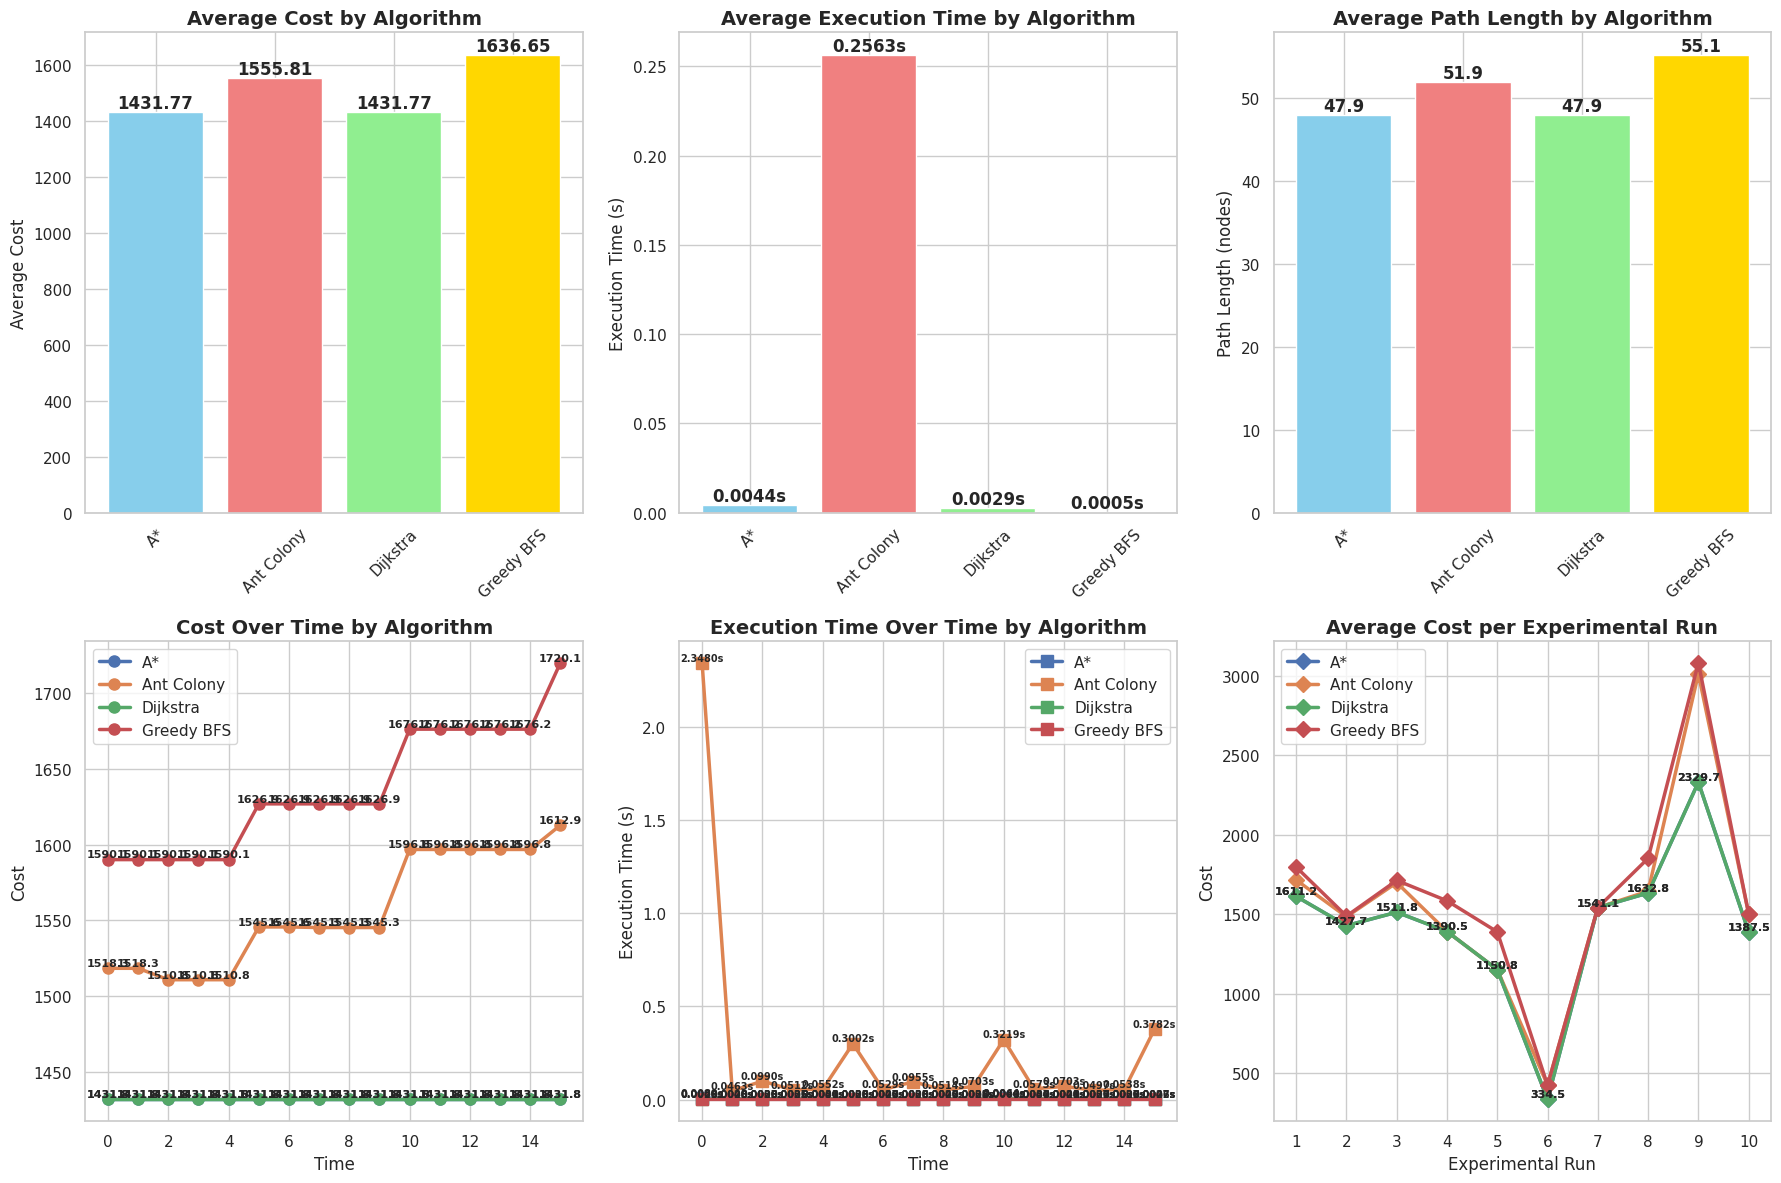


PERFORMANCE RANKING

Rank by Cost (Lower is Better):
1. A*: 1431.77
2. Dijkstra: 1431.77
3. Ant Colony: 1555.81
4. Greedy BFS: 1636.65

Rank by Execution Time (Lower is Better):
1. Greedy BFS: 0.0005s
2. Dijkstra: 0.0029s
3. A*: 0.0044s
4. Ant Colony: 0.2563s

Rank by Success Rate (Higher is Better):
1. A*: 100.0%
2. Ant Colony: 100.0%
3. Dijkstra: 100.0%
4. Greedy BFS: 100.0%


In [167]:
# ====================== EVENT CLASS DEFINITION ======================

class Event:
    def __init__(self, time, event_type, data):
        self.time = time
        self.event_type = event_type
        self.data = data

    # Add comparison methods for heapq - THIS FIXES THE ERROR
    def __lt__(self, other):
        return self.time < other.time

    def __eq__(self, other):
        return self.time == other.time

    def __repr__(self):
        return f"Event(time={self.time}, type={self.event_type}, data={self.data})"

def run_simulation_detailed(graph, events, start_node, end_node, max_time):
    """Run the discrete event simulation with detailed text output"""
    current_time = 0
    heapq.heapify(events)

    # Initialize results storage
    results = []

    # Initialize algorithms
    astar = AStarOptimizer(graph)
    greedy = GreedyBFSOptimizer(graph)
    ant_colony = OptimizedAntColony(graph, n_ants=15, n_iterations=50, decay=0.6, alpha=1, beta=2, gamma=2,
                                  elitist_factor=1.5, stagnation_limit=10)

    print(f"\nInitial state at time {current_time}:")

    # Get initial blocked edges
    initial_blocked = []
    for u, v, data in graph.edges(data=True):
        if data.get('is_blocked', False):
            initial_blocked.append((u, v))

    print(f"Blocked edges: {initial_blocked}")

    # Run algorithms at initial state
    algorithms = [
        ("Dijkstra", lambda: run_dijkstra(graph, start_node, end_node)),
        ("A*", lambda: astar.find_path(start_node, end_node)),
        ("Greedy BFS", lambda: greedy.find_path(start_node, end_node)),
        ("Ant Colony", lambda: ant_colony.run(start_node, end_node))
    ]

    for algo_name, algo_func in algorithms:
        path, cost, exec_time = algo_func()
        path_length = len(path) if path else 0
        path_found = path is not None and path_length > 0

        status = "SUCCESS" if path_found else "FAILED"
        print(f"{algo_name}: {status} | Cost: {cost:.2f} | Time: {exec_time:.4f}s | Nodes: {path_length}")

        results.append({
            'time': current_time,
            'algorithm': algo_name,
            'path_found': path_found,
            'cost': cost if path_found else float('inf'),
            'execution_time': exec_time,
            'path_length': path_length,
            'travel_time': compute_travel_time(graph, path)
        })

    current_time += 1

    while events and current_time <= max_time:
        # Process all events at current time
        events_processed = False
        while events and events[0].time <= current_time:
            event = heapq.heappop(events)
            events_processed = True

            # ACTUALLY PROCESS THE EVENT - ADD THIS PART
            if event.event_type == "block":
                print(f"\nTime {current_time}: Handling block event on edges {event.data.get('edges', [])}")
                for edge in event.data.get("edges", []):
                    u, v = edge
                    if graph.has_edge(u, v):
                        graph[u][v]["is_blocked"] = True
                        # If the graph is undirected, also block the reverse edge
                        if not isinstance(graph, nx.DiGraph) and graph.has_edge(v, u):
                            graph[v][u]["is_blocked"] = True
                        print(f"Blocked edge: {u} -> {v}")
            elif event.event_type == "unblock":
                print(f"\nTime {current_time}: Handling unblock event on edges {event.data.get('edges', [])}")
                for edge in event.data.get("edges", []):
                    u, v = edge
                    if graph.has_edge(u, v):
                        graph[u][v]["is_blocked"] = False
                        if not isinstance(graph, nx.DiGraph) and graph.has_edge(v, u):
                            graph[v][u]["is_blocked"] = False
                        print(f"Unblocked edge: {u} -> {v}")

        # Run all pathfinding algorithms at this time step
        time_step_results = []

        for algo_name, algo_func in algorithms:
            path, cost, exec_time = algo_func()

            path_length = len(path) if path else 0
            path_found = path is not None and path_length > 0

            result = {
                'time': current_time,
                'algorithm': algo_name,
                'path_found': path_found,
                'cost': cost if path_found else float('inf'),
                'execution_time': exec_time,
                'path_length': path_length,
                'travel_time': compute_travel_time(graph, path)
            }
            results.append(result)
            time_step_results.append(result)

        # Print algorithm results for this time step
        if events_processed or current_time % 5 == 0:  # Print at event times and every 5 steps
            for result in time_step_results:
                status = "SUCCESS" if result['path_found'] else "FAILED"
                print(f"{result['algorithm']}: {status} | Cost: {result['cost']:.2f} | Time: {result['execution_time']:.4f}s | Nodes: {result['path_length']}")

        current_time += 1

    return pd.DataFrame(results)

# ====================== MODIFIED EXPERIMENTAL RUNS SIMULATION ======================

def run_experimental_simulation_detailed():
    """Run 10 experimental runs with detailed text output"""

    # (KEEP THE SAME start_nodes, end_nodes, and blockage_scenarios AS BEFORE)
    start_nodes = [
        "(14.179543, 121.241683)",
        "(14.171040, 121.243496)",
        "(14.171858, 121.243272)",
        "(14.173302, 121.243276)",
        "(14.173451, 121.243273)",
        "(14.175292, 121.243018)",
        "(14.181253, 121.226203)",
        "(14.171483, 121.242017)",
        "(14.175736, 121.222110)",
        "(14.171264, 121.258229)"
    ]

    end_nodes = [
        "(14.153306, 121.248118)",
        "(14.149233, 121.253016)",
        "(14.150054, 121.252873)",
        "(14.151516, 121.252529)",
        "(14.170005, 121.254786)",
        "(14.170340, 121.245723)",
        "(14.161556, 121.242401)",
        "(14.150111, 121.250916)",
        "(14.163471, 121.254012)",
        "(14.171397, 121.248930)"
    ]

    blockage_scenarios = [
        # Run 1
        [Event(5, "block", {"edges": [("(14.169214, 121.244370)", "(14.169575, 121.244248)")]}),
         Event(10, "block", {"edges": [("(14.166271, 121.244053)", "(14.165761, 121.244289)")]}),
         Event(15, "block", {"edges": [("(14.163386, 121.243435)", "(14.161610, 121.244569)")]})],
        # Run 2
        [Event(5, "block", {"edges": [("(14.152434, 121.251267)", "(14.151516, 121.252529)")]}),
         Event(10, "block", {"edges": [("(14.164210, 121.244958)", "(14.161423, 121.246604)")]}),
         Event(15, "block", {"edges": [("(14.166767, 121.243829)", "(14.166271, 121.244053)")]})],
        # Run 3
        [Event(5, "block", {"edges": [("(14.151516, 121.252529)", "(14.150273, 121.253909)")]}),
         Event(10, "block", {"edges": [("(14.160591, 121.245181)", "(14.159809, 121.243620)")]}),
         Event(15, "block", {"edges": [("(14.164210, 121.244958)", "(14.161423, 121.246604)")]})],
        # Run 4
        [Event(5, "block", {"edges": [("(14.180594, 121.224061)", "(14.180366, 121.223488)")]}),
         Event(10, "block", {"edges": [("(14.180080, 121.222858)", "(14.179680, 121.223061)")]}),
         Event(15, "block", {"edges": [("(14.180658, 121.223369)", "(14.180319, 121.222722)")]})],
        # Run 5
        [Event(5, "block", {"edges": [("(14.174658, 121.246480)", "(14.174912, 121.246918)")]}),
         Event(10, "block", {"edges": [("(14.171040, 121.243496)", "(14.171858, 121.243272)")]}),
         Event(15, "block", {"edges": [("(14.175426, 121.242984)", "(14.176939, 121.242602)")]})],
        # Run 6
        [Event(5, "block", {"edges": [("(14.172744, 121.243268)", "(14.172762, 121.245463)")]}),
         Event(10, "block", {"edges": [("(14.171215, 121.246257)", "(14.172224, 121.245735)")]}),
         Event(15, "block", {"edges": [("(14.169900, 121.244073)", "(14.171040, 121.243496)")]})],
        # Run 7
        [Event(5, "block", {"edges": [("(14.171040, 121.243496)", "(14.171858, 121.243272)")]}),
         Event(10, "block", {"edges": [("(14.165922, 121.243152)", "(14.166271, 121.244053)")]}),
         Event(15, "block", {"edges": [("(14.164236, 121.241199)", "(14.165535, 121.242136)")]})],
        # Run 8
        [Event(5, "block", {"edges": [("(14.164210, 121.244958)", "(14.161423, 121.246604)")]}),
         Event(10, "block", {"edges": [("(14.153705, 121.250820)", "(14.154971, 121.250561)")]}),
         Event(15, "block", {"edges": [("(14.152434, 121.251267)", "(14.151516, 121.252529)")]})],
        # Run 9
        [Event(5, "block", {"edges": [("(14.165679, 121.236798)", "(14.166228, 121.238049)")]}),
         Event(10, "block", {"edges": [("(14.176881, 121.250416)", "(14.176785, 121.253235)")]}),
         Event(15, "block", {"edges": [("(14.165332, 121.240789)", "(14.164236, 121.241199)")]})],
        # Run 10
        [Event(5, "block", {"edges": [("(14.169470, 121.245565)", "(14.170167, 121.245275)")]}),
         Event(10, "block", {"edges": [("(14.172607, 121.246809)", "(14.172420, 121.246906)")]}),
         Event(15, "block", {"edges": [("(14.172466, 121.246237)", "(14.171430, 121.246758)")]})]
    ]

    all_results = []

    # RUN ALL 10 EXPERIMENTS WITH DETAILED OUTPUT
    for run in range(10):
        print(f"\n{'='*60}")
        print(f"EXPERIMENTAL RUN {run + 1}")
        print(f"{'='*60}")
        print(f"Start: {start_nodes[run]}")
        print(f"End: {end_nodes[run]}")
        print(f"Blockage events: {len(blockage_scenarios[run])}")

        # Build fresh graph for each run
        G = build_graph(df, cost_mode="hybrid")

        # Run simulation with detailed output for this experimental run
        results_df = run_simulation_detailed(G, blockage_scenarios[run].copy(),
                                           start_nodes[run], end_nodes[run], max_time=20)

        # Add run identifier
        results_df['run'] = run + 1
        results_df['start_node'] = start_nodes[run]
        results_df['end_node'] = end_nodes[run]

        all_results.append(results_df)

        print(f"\nCompleted Run {run + 1}")
        print(f"{'='*60}")

    # Combine all results
    combined_results = pd.concat(all_results, ignore_index=True)

    return combined_results

def analyze_experimental_results(results_df):
    """Analyze and visualize results from all experimental runs"""

    print(f"\n{'='*80}")
    print("OVERALL EXPERIMENTAL RESULTS SUMMARY")
    print(f"{'='*80}")

    # Overall success rate
    success_rate = results_df.groupby('algorithm')['path_found'].mean() * 100
    print("\nOverall Success Rate (%):")
    for algo, rate in success_rate.items():
        print(f"  {algo}: {rate:.1f}%")

    # Average performance metrics
    avg_metrics = results_df.groupby('algorithm').agg({
        'cost': 'mean',
        'execution_time': 'mean',
        'path_length': 'mean'
    }).round(4)

    print("\nAverage Performance Metrics:")
    print(avg_metrics)

    # Plot overall results
    plt.figure(figsize=(18, 12))

    # 1. Average Cost by Algorithm (Bar plot with values)
    plt.subplot(2, 3, 1)
    avg_cost_by_algo = results_df.groupby('algorithm')['cost'].mean().reset_index()
    bars = plt.bar(avg_cost_by_algo['algorithm'], avg_cost_by_algo['cost'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title('Average Cost by Algorithm', fontsize=14, fontweight='bold')
    plt.ylabel('Average Cost')
    plt.xticks(rotation=45)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontweight='bold')

    # 2. Average Execution Time by Algorithm (Bar plot with values)
    plt.subplot(2, 3, 2)
    avg_time_by_algo = results_df.groupby('algorithm')['execution_time'].mean().reset_index()
    bars = plt.bar(avg_time_by_algo['algorithm'], avg_time_by_algo['execution_time'],
                  color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title('Average Execution Time by Algorithm', fontsize=14, fontweight='bold')
    plt.ylabel('Execution Time (s)')
    plt.xticks(rotation=45)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}s',
                ha='center', va='bottom', fontweight='bold')

    # 3. Average Path Length by Algorithm (Bar plot with values)
    plt.subplot(2, 3, 3)
    avg_length_by_algo = results_df.groupby('algorithm')['path_length'].mean().reset_index()
    bars = plt.bar(avg_length_by_algo['algorithm'], avg_length_by_algo['path_length'],
                  color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
    plt.title('Average Path Length by Algorithm', fontsize=14, fontweight='bold')
    plt.ylabel('Path Length (nodes)')
    plt.xticks(rotation=45)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontweight='bold')

    # 4. Cost Over Time (Line plot with markers and values)
    plt.subplot(2, 3, 4)
    cost_by_time_algo = results_df.groupby(['time', 'algorithm'])['cost'].mean().reset_index()
    for algo in cost_by_time_algo['algorithm'].unique():
        algo_data = cost_by_time_algo[cost_by_time_algo['algorithm'] == algo]
        plt.plot(algo_data['time'], algo_data['cost'], marker='o', linewidth=2.5, markersize=8, label=algo)

        # Add value labels for each point
        for i, row in algo_data.iterrows():
            plt.text(row['time'], row['cost'] + 0.1, f'{row["cost"]:.1f}',
                    ha='center', va='bottom', fontsize=8, fontweight='bold')

    plt.title('Cost Over Time by Algorithm', fontsize=14, fontweight='bold')
    plt.ylabel('Cost')
    plt.xlabel('Time')
    plt.legend()

    # 5. Execution Time Over Time (Line plot with markers and values)
    plt.subplot(2, 3, 5)
    time_by_time_algo = results_df.groupby(['time', 'algorithm'])['execution_time'].mean().reset_index()
    for algo in time_by_time_algo['algorithm'].unique():
        algo_data = time_by_time_algo[time_by_time_algo['algorithm'] == algo]
        plt.plot(algo_data['time'], algo_data['execution_time'], marker='s', linewidth=2.5, markersize=8, label=algo)

        # Add value labels for each point
        for i, row in algo_data.iterrows():
            plt.text(row['time'], row['execution_time'] + 0.001, f'{row["execution_time"]:.4f}s',
                    ha='center', va='bottom', fontsize=7, fontweight='bold')

    plt.title('Execution Time Over Time by Algorithm', fontsize=14, fontweight='bold')
    plt.ylabel('Execution Time (s)')
    plt.xlabel('Time')
    plt.legend()

    # 6. Average Cost per Experimental Run (Line plot with markers and values)
    plt.subplot(2, 3, 6)
    cost_by_run_algo = results_df.groupby(['run', 'algorithm'])['cost'].mean().reset_index()
    for algo in cost_by_run_algo['algorithm'].unique():
        algo_data = cost_by_run_algo[cost_by_run_algo['algorithm'] == algo]
        plt.plot(algo_data['run'], algo_data['cost'], marker='D', linewidth=2.5, markersize=8, label=algo)

        # Add value labels for each point (every other point to avoid clutter)
        for i, row in algo_data.iterrows():
            if i % 2 == 0:  # Show every other point to reduce clutter
                plt.text(row['run'], row['cost'] + 0.1, f'{row["cost"]:.1f}',
                        ha='center', va='bottom', fontsize=8, fontweight='bold')

    plt.title('Average Cost per Experimental Run', fontsize=14, fontweight='bold')
    plt.ylabel('Cost')
    plt.xlabel('Experimental Run')
    plt.xticks(range(1, 11))
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Performance ranking
    print(f"\n{'='*80}")
    print("PERFORMANCE RANKING")
    print(f"{'='*80}")

    # Rank by cost (lower is better)
    cost_ranking = results_df.groupby('algorithm')['cost'].mean().sort_values()
    print(f"\nRank by Cost (Lower is Better):")
    for i, (algo, cost) in enumerate(cost_ranking.items(), 1):
        print(f"{i}. {algo}: {cost:.2f}")

    # Rank by execution time (lower is better)
    time_ranking = results_df.groupby('algorithm')['execution_time'].mean().sort_values()
    print(f"\nRank by Execution Time (Lower is Better):")
    for i, (algo, time) in enumerate(time_ranking.items(), 1):
        print(f"{i}. {algo}: {time:.4f}s")

    # Rank by success rate (higher is better)
    success_ranking = results_df.groupby('algorithm')['path_found'].mean().sort_values(ascending=False)
    print(f"\nRank by Success Rate (Higher is Better):")
    for i, (algo, rate) in enumerate(success_ranking.items(), 1):
        print(f"{i}. {algo}: {rate:.1%}")

    return success_rate, avg_metrics

# ====================== UPDATED MAIN FUNCTION ======================

def main_detailed():
    """Main function to run experimental runs with detailed text output"""

    print("\n" + "="*80)
    print("STARTING 10 EXPERIMENTAL RUNS WITH DETAILED TEXT OUTPUT")
    print("="*80)
    print("Output format:")
    print("- Initial state at time 0")
    print("- Block/unblock events with affected edges")
    print("- Algorithm results after each event")
    print("="*80)

    # Run experimental simulations with detailed output
    experimental_results = run_experimental_simulation_detailed()

    # Analyze experimental results
    success_rates, avg_metrics = analyze_experimental_results(experimental_results)

    return experimental_results, success_rates, avg_metrics

# Run the detailed version
if __name__ == "__main__":
    experimental_results, success_rates, avg_metrics = main_detailed()